In [1]:
# CAN TUTUNCU Data Assignment 2 in Python

In [2]:
### Part 1: Data merging and cleaning

In [3]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import the patent data 
pat = pd.read_stata("/Users/tokyo/Documents/Bocconi University/ESS/20971 Innovation and Growth/Data Task/pat76_06_ipc.dta")
pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857833 entries, 0 to 4857832
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   appyear         int16  
 1   cat             float64
 2   gyear           int16  
 3   icl             object 
 4   icl_class       object 
 5   icl_maingroup   float32
 6   iclnum          int8   
 7   nclass          float64
 8   numipc          int8   
 9   patent          int32  
 10  pdpass          float64
 11  subcat          float64
 12  subclass        float32
 13  uspto_assignee  float64
dtypes: float32(2), float64(5), int16(2), int32(1), int8(2), object(2)
memory usage: 342.8+ MB


In [5]:
# we drop the NaN values in the column 'pdpass'.
pat = pat.dropna(subset='pdpass')

# count how many times pdpass is repeated for every year in a new column
pat['tot_pat_year'] = pat.groupby(['pdpass', 'appyear'])['pdpass'].transform('count')

# drop the duplicate rows
pat = pat.drop_duplicates(subset='pdpass')


In [6]:
# reset the index now (not necessary to do)
pat = pat.reset_index(drop=True)


pat.head(-10)

,appyear,cat,gyear,icl,icl_class,icl_maingroup,iclnum,nclass,numipc,patent,pdpass,subcat,subclass,uspto_assignee,tot_pat_year
0,1974,6.0,1976,A41D 1900,A41D,19.0,1,2.0,1,3930271,10030271.0,63.0,161.399994,251415.0,1
1,1974,6.0,1976,A47D 701,A47D,7.0,1,5.0,1,3930272,10156902.0,65.0,11.000000,246000.0,1
2,1975,6.0,1976,A47D 702,A47D,7.0,1,5.0,2,3930273,10112031.0,65.0,430.000000,10490.0,8
3,1972,6.0,1976,B60S 304,B60S,3.0,1,15.0,1,3930276,10030276.0,69.0,53.400002,243840.0,1
4,1974,6.0,1976,E01F 104,E01F,1.0,1,15.0,1,3930277,10172187.0,69.0,83.000000,8665.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223942,2001,2.0,2006,G06F 15/16,G06F,15.0,1,709.0,4,7155477,13255477.0,22.0,203.000000,NaN,4
223943,2002,2.0,2006,G06F 15/173,G06F,15.0,1,709.0,2,7155510,13255510.0,22.0,224.000000,NaN,2
223944,2003,2.0,2006,H06F 15/16,H06F,15.0,1,709.0,2,7155514,13255514.0,22.0,225.000000,NaN,2
223945,2001,2.0,2006,G06F 15/16,G06F,15.0,1,709.0,3,7155524,23255524.0,22.0,229.000000,NaN,3


In [7]:
# select the necessary columns
columns_to_keep = ['appyear', 'pdpass','tot_pat_year']
pat = pat[columns_to_keep]

pat.head(-10)

,appyear,pdpass,tot_pat_year
0,1974,10030271.0,1
1,1974,10156902.0,1
2,1975,10112031.0,8
3,1972,10030276.0,1
4,1974,10172187.0,2
...,...,...,...
223942,2001,13255477.0,4
223943,2002,13255510.0,2
223944,2003,13255514.0,2
223945,2001,23255524.0,3


In [8]:
# import the dynass data
dynass = pd.read_stata("/Users/tokyo/Documents/Bocconi University/ESS/20971 Innovation and Growth/Data Task/dynass.dta")
dynass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13458 entries, 0 to 13457
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pdpass  13458 non-null  int32  
 1   pdpco1  13458 non-null  int32  
 2   source  13458 non-null  object 
 3   begyr1  13458 non-null  int16  
 4   gvkey1  13458 non-null  int32  
 5   endyr1  13458 non-null  int16  
 6   pdpco2  2302 non-null   float64
 7   begyr2  2302 non-null   float64
 8   gvkey2  2302 non-null   float64
 9   endyr2  2302 non-null   float64
 10  pdpco3  281 non-null    float64
 11  begyr3  281 non-null    float64
 12  gvkey3  281 non-null    float64
 13  endyr3  281 non-null    float64
 14  pdpco4  41 non-null     float64
 15  begyr4  41 non-null     float64
 16  gvkey4  41 non-null     float64
 17  endyr4  41 non-null     float64
 18  pdpco5  1 non-null      float64
 19  begyr5  1 non-null      float64
 20  gvkey5  1 non-null      float64
 21  endyr5  1 non-null      float64
dty

In [9]:
dynass.head()

,pdpass,pdpco1,source,begyr1,gvkey1,endyr1,pdpco2,begyr2,gvkey2,endyr2,...,gvkey3,endyr3,pdpco4,begyr4,gvkey4,endyr4,pdpco5,begyr5,gvkey5,endyr5
0,-19702,66448,m2006,1997,66448,2005,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-19541,121844,m2006,1997,121844,2006,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-19540,121844,m2006,1997,121844,2006,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-19291,62613,m2006,1995,62613,2006,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-19289,176118,m2006,2004,176118,2006,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# merge the patent data and dynass data using pdpass
merged_pat = pd.merge(pat, dynass, on='pdpass')
merged_pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13400 entries, 0 to 13399
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   appyear       13400 non-null  int16  
 1   pdpass        13400 non-null  float64
 2   tot_pat_year  13400 non-null  int64  
 3   pdpco1        13400 non-null  int32  
 4   source        13400 non-null  object 
 5   begyr1        13400 non-null  int16  
 6   gvkey1        13400 non-null  int32  
 7   endyr1        13400 non-null  int16  
 8   pdpco2        2295 non-null   float64
 9   begyr2        2295 non-null   float64
 10  gvkey2        2295 non-null   float64
 11  endyr2        2295 non-null   float64
 12  pdpco3        280 non-null    float64
 13  begyr3        280 non-null    float64
 14  gvkey3        280 non-null    float64
 15  endyr3        280 non-null    float64
 16  pdpco4        41 non-null     float64
 17  begyr4        41 non-null     float64
 18  gvkey4        41 non-null 

In [11]:
# row-wise conditional check across multiple column groups using 'appyear'. Store the matching gvkey{i} for all i=1,2,3,4,5 into a new column 'gvkey'.
# matching function to apply on each row
def get_all_matches(row):
    matches = []
    for i in range(1, 6):
        beg = row.get(f'begyr{i}')
        end = row.get(f'endyr{i}')
        gvkey = row.get(f'gvkey{i}')
        app = row['appyear']

        if pd.notnull(beg) and pd.notnull(end) and pd.notnull(app): # Ignore the null entries
            if beg <= app <= end: #selection criteria
                matches.append(gvkey)  # gvkey{i} that matches
    return matches if matches else np.nan

# apply to every row and store in a new column 'gvkey'.
merged_pat['gvkey'] = merged_pat.apply(get_all_matches, axis=1)

# in case there are multiple matches to appyear in one row, explode them to new rows.
merged_pat = merged_pat.explode('gvkey')

# sort the dataframe with 'gvkey' in ascending order
merged_pat = merged_pat.sort_values(by='gvkey', ascending=True).reset_index(drop=True)
merged_pat = merged_pat.dropna(subset='gvkey')

# move the gvkey column to the front
cols = merged_pat.columns.tolist()
cols.insert(0, cols.pop(cols.index('gvkey')))
merged_pat = merged_pat[cols]

# (if not already) transform 'gvkey' into a string
merged_pat['gvkey'] = merged_pat['gvkey'].astype(str)

In [12]:
# group the data by every unique pair of 'gvkey' and 'appyear' and sum 'tot_pat_year for each group
merged_pat = merged_pat.groupby(['gvkey', 'appyear'], as_index=False)['tot_pat_year'].sum()
merged_pat.head()


,gvkey,appyear,tot_pat_year
0,1000,1975,3
1,100004,2001,45
2,10001,1973,5
3,100011,2002,1
4,10004,1974,5


In [13]:
# import the pdpcohdr data
pdpcohdr = pd.read_stata("/Users/tokyo/Documents/Bocconi University/ESS/20971 Innovation and Growth/Data Task/pdpcohdr.dta")
pdpcohdr = pdpcohdr.dropna(subset='gvkey')

#transform 'gvkey' into a string
pdpcohdr['gvkey'] = pdpcohdr['gvkey'].astype(str)
pdpcohdr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     25480 non-null  object 
 1   cusip    25480 non-null  object 
 2   firstyr  25480 non-null  int16  
 3   gvkey    25480 non-null  object 
 4   lastyr   25480 non-null  int16  
 5   pdpco    25480 non-null  int32  
 6   pdpseq   25480 non-null  int8   
 7   begyr    25144 non-null  float64
 8   endyr    25144 non-null  float64
 9   match    12193 non-null  float32
dtypes: float32(1), float64(2), int16(2), int32(1), int8(1), object(3)
memory usage: 1.3+ MB


In [14]:
# merge the refined patent data with the pdpcohdr data using gvkey
merged_gvkey = pd.merge(merged_pat, pdpcohdr, on='gvkey')

# select the necessary columns
columns_to_keep2 = ['gvkey', 'appyear', 'tot_pat_year','match']
merged_gvkey = merged_gvkey[columns_to_keep2]

In [15]:
# import the compustat data
compustat = pd.read_csv("/Users/tokyo/Documents/Bocconi University/ESS/20971 Innovation and Growth/Data Task/WRDS_Company.csv")
compustat['gvkey'] = compustat['gvkey'].astype(str)
compustat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482722 entries, 0 to 482721
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   gvkey     482722 non-null  object 
 1   datadate  482722 non-null  object 
 2   fyear     482347 non-null  float64
 3   indfmt    482722 non-null  object 
 4   consol    482722 non-null  object 
 5   popsrc    482722 non-null  object 
 6   datafmt   482722 non-null  object 
 7   curcd     482347 non-null  object 
 8   emp       330952 non-null  float64
 9   sale      392198 non-null  float64
 10  xrd       175877 non-null  float64
 11  exchg     482556 non-null  float64
 12  costat    482722 non-null  object 
 13  fic       482722 non-null  object 
 14  sic       482722 non-null  int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 55.2+ MB


In [16]:
# scale up 'emp' and 'sale' because pandas view dot as a decimal separator and not thousand separator
compustat['emp'] = compustat['emp'] * 1000
compustat['sale'] = compustat['sale'] * 1000

In [17]:
# merge compustat data with the refined pattern data using 'gvkey' and 'appyear'/'fyear'
final_data = pd.merge(merged_gvkey, compustat, left_on=['gvkey', 'appyear'],
    right_on=['gvkey', 'fyear'],
    how='right')

final_data = final_data.drop(columns='appyear')

In [18]:
# remove the rows where both 'tot_pat_year' and 'fyear' are NaN.
final_data = final_data.dropna(subset=['tot_pat_year', 'fyear'], how='all')

In [19]:
# for the rows where the matches are non-null, assign zero to 'tot_pat_year' (there were none it seems anyway)
mask = final_data['match'].notna() & final_data['tot_pat_year'].isna()
final_data.loc[mask, 'tot_pat_year'] = 0
final_data = final_data.drop(columns='match')

In [20]:
# select the row data that is betweeen 1980 and 2000
final_data = final_data[(final_data['fyear'] >= 1980) & (final_data['fyear'] <= 2000)]

In [21]:
# select firms only incorporated in the US.
final_data = final_data[final_data['fic'] == 'USA']

# furthermore from these firms select the ones that report in US dollars.
final_data = final_data[final_data['curcd'] == 'USD']


In [22]:
# replace the NaN entries in 'match' column with 0.0
final_data['tot_pat_year'] = final_data['tot_pat_year'].fillna(0.0)

In [23]:
### Part 2: Innovative Firms

In [24]:
# select the maximum value of 'tot_pat_year' for every group of 'gvkey' and store it in 'max_pat'
final_data['max_pat'] = final_data.groupby('gvkey')['tot_pat_year'].transform('max')

In [25]:
# in a new column variable 'innovative_firm', write for firms with at least one patent 'yes'
final_data['innovative'] = final_data['max_pat'].apply(lambda x: 'yes' if x > 0 else 'no')

In [26]:
# check that each 'gvkey' has only one unique corresponding 'innovative' value
final_data.groupby('gvkey')['innovative'].nunique().value_counts()

innovative
1    20693
Name: count, dtype: int64

In [27]:
# check the share of firms which have at least one pattern.
final_data['innovative'].value_counts('yes')

innovative
no     0.807348
yes    0.192652
Name: proportion, dtype: float64

In [28]:
# aggregate the employment size of firms by taking average of employment for every 'gvkey' group
firm_emp = final_data.groupby('gvkey').agg({
    'emp': 'mean',  # or median, max, etc.
    'innovative': 'first'
}).reset_index()

In [29]:
# compare the average employment size of innovative and non-innovative firms
firm_emp.groupby('innovative')['emp'].mean()

innovative
no     2475.797813
yes    6373.344504
Name: emp, dtype: float64

In [30]:
# compare the standard deviation of employment size
firm_emp.groupby('innovative')['emp'].std()

innovative
no     12491.402329
yes    27013.559088
Name: emp, dtype: float64

In [31]:
firm_emp.groupby('innovative')['emp'].agg(['mean', 'std'])

,mean,std
innovative,,
no,2475.797813,12491.402329
yes,6373.344504,27013.559088


In [32]:
# aggregate the sale size of firms by taking average of sale for every 'gvkey' group
firm_sale = final_data.groupby('gvkey').agg({
    'sale': 'mean',  # or median, max, etc.
    'innovative': 'first'
}).reset_index()

In [33]:
# compare the sale size of innovative and non-innovative firms
firm_sale.groupby('innovative')['sale'].mean()

innovative
no     3.717888e+05
yes    1.046117e+06
Name: sale, dtype: float64

In [34]:
# compare the standard deviation of sale size
firm_sale.groupby('innovative')['sale'].std()

innovative
no     1.872535e+06
yes    4.747847e+06
Name: sale, dtype: float64

In [35]:
firm_sale.groupby('innovative')['sale'].agg(['mean', 'std'])

,mean,std
innovative,,
no,3.717888e+05,1.872535e+06
yes,1.046117e+06,4.747847e+06


In [36]:
### Part 3: Firm Growth by Firm Size

In [37]:
# select only the innovative firms
innovative_firms = final_data[final_data['innovative'] == 'yes'].copy()

In [38]:
# calculate employment growth (forward) percentage wise
innovative_firms['emp_growth_rate'] = innovative_firms.groupby('gvkey')['emp'].pct_change(periods=1, fill_method=None).shift(-1) * 100

In [39]:
# apply winsorization by imposing 1000% growth cap
innovative_firms['emp_growth_rate'] = innovative_firms['emp_growth_rate'].clip(upper=1000)

In [40]:
# row-level mean. we assign equal weight to row year data of all firms
innovative_firms['emp_growth_rate'].mean()

np.float64(13.510865997942071)

In [41]:
# firm-level mean. we assign equal weight to every single firm after taking the average of their growth rate
innovative_firms.groupby('gvkey')['emp_growth_rate'].mean().mean()

np.float64(23.23304817723261)

/var/folders/_c/8gt5ng6n0qv718frnnh0n3_80000gn/T/ipykernel_39271/4249176892.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = innovative_firms.groupby('size_bin').agg(


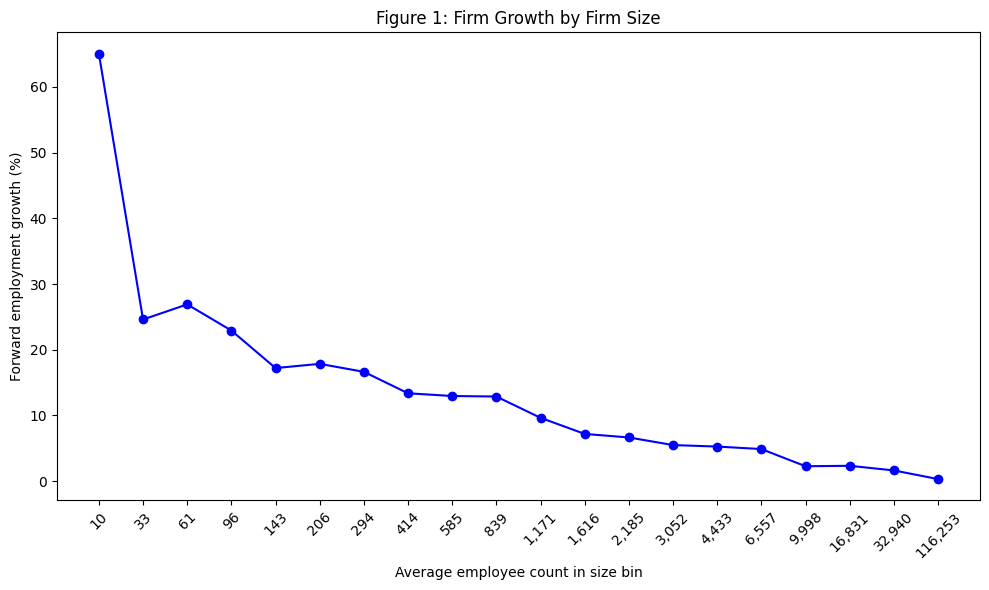

In [42]:
# replicate figure 1
# create 20 roughly equal‐sized bins based on employee count
innovative_firms['size_bin'] = pd.qcut(innovative_firms['emp'], q=20)

# Now, group by these bins and calculate:
# - avg_emp: average employee count per bin
# - avg_growth: average forward employment growth per bin
binned = innovative_firms.groupby('size_bin').agg(
    avg_emp=('emp', 'mean'),
    avg_growth=('emp_growth_rate', 'mean')
).reset_index()

# create equal spacing in the x-axis corresponding to the bins
binned['bin_order'] = range(1, len(binned) + 1)

plt.figure(figsize=(10, 6))
plt.plot(binned['bin_order'], binned['avg_growth'], marker='o', linestyle='-', color='blue')
plt.xlabel('Average employee count in size bin')
plt.ylabel('Forward employment growth (%)')
plt.title('Figure 1: Firm Growth by Firm Size')
plt.xticks(ticks=binned['bin_order'], labels=[f"{x:,.0f}" for x in binned['avg_emp']], rotation=45)

plt.grid(False)
plt.tight_layout()
plt.show()

In [43]:
# create data frame for the regression
reg_data = innovative_firms[['gvkey', 'fyear', 'emp_growth_rate', 'emp']].copy()
reg_data = reg_data.replace([np.inf, -np.inf], np.nan).dropna()

# define log_emp
reg_data = reg_data[reg_data['emp'] > 0]
reg_data['log_emp'] = np.log(reg_data['emp'])

# set the panel index
reg_data = reg_data.set_index(['gvkey', 'fyear'])

In [44]:
# run the regression
from linearmodels.panel import PanelOLS # type: ignore
mod = PanelOLS.from_formula('emp_growth_rate ~ log_emp + EntityEffects + TimeEffects', data=reg_data)
results = mod.fit()
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:        emp_growth_rate   R-squared:                        0.0946
Estimator:                   PanelOLS   R-squared (Between):             -20.837
No. Observations:               29161   R-squared (Within):               0.0964
Date:                Mon, May 05 2025   R-squared (Overall):             -14.032
Time:                        10:33:48   Log-likelihood                -1.583e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2755.8
Entities:                        2779   P-value                           0.0000
Avg Obs:                       10.493   Distribution:                 F(1,26362)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             2755.8
                            

In [45]:
# replicate the graph for the alternative measure of firm growth rate (can't use .pct_change this time)
# calculate lagged employment per firm
innovative_firms2 = innovative_firms.copy()
innovative_firms2['emp_lag'] = innovative_firms2.groupby('gvkey')['emp'].shift(1)
innovative_firms2['alt_emp_growth_rate'] = ((innovative_firms2['emp'] - innovative_firms2['emp_lag']) /
                                      (0.5 * (innovative_firms2['emp'] + innovative_firms2['emp_lag']))).shift(-1) * 100

innovative_firms2.head()

,gvkey,tot_pat_year,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,emp,...,exchg,costat,fic,sic,max_pat,innovative,emp_growth_rate,size_bin,emp_lag,alt_emp_growth_rate
135,1013,0.0,1980-10-31,1980.0,INDL,C,D,STD,USD,1435.0,...,14.0,I,USA,3661,5.0,yes,5.435540,"(1382.0, 1880.0]",NaN,5.291723
136,1013,0.0,1981-10-31,1981.0,INDL,C,D,STD,USD,1513.0,...,14.0,I,USA,3661,5.0,yes,17.052214,"(1382.0, 1880.0]",1435.0,15.712546
137,1013,0.0,1982-10-31,1982.0,INDL,C,D,STD,USD,1771.0,...,14.0,I,USA,3661,5.0,yes,7.171090,"(1382.0, 1880.0]",1513.0,6.922867
138,1013,0.0,1983-10-31,1983.0,INDL,C,D,STD,USD,1898.0,...,14.0,I,USA,3661,5.0,yes,-18.124341,"(1880.0, 2557.65]",1771.0,-19.930475
139,1013,5.0,1984-10-31,1984.0,INDL,C,D,STD,USD,1554.0,...,14.0,I,USA,3661,5.0,yes,11.261261,"(1382.0, 1880.0]",1898.0,10.660981


/var/folders/_c/8gt5ng6n0qv718frnnh0n3_80000gn/T/ipykernel_39271/2115939429.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned2 = innovative_firms2.groupby('size_bin').agg(


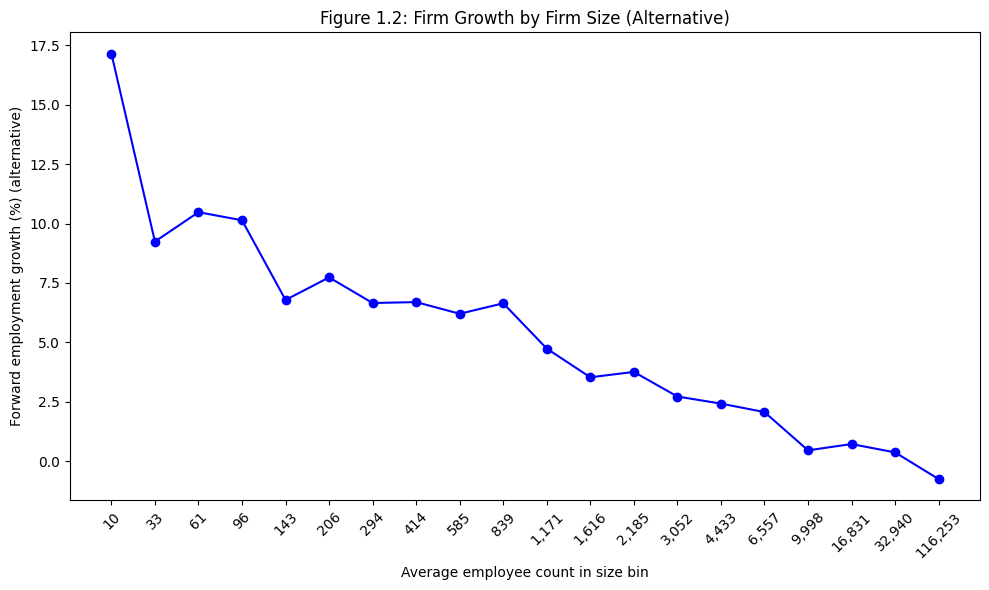

In [46]:
# replicate figure 1
# create 20 roughly equal‐sized bins based on employee count
innovative_firms2['size_bin'] = pd.qcut(innovative_firms2['emp'], q=20)

# Now, group by these bins and calculate:
# - avg_emp: average employee count per bin
# - avg_growth: average forward employment growth per bin
binned2 = innovative_firms2.groupby('size_bin').agg(
    avg_emp=('emp', 'mean'),
    avg_growth=('alt_emp_growth_rate', 'mean')
).reset_index()

# create equal spacing in the x-axis corresponding to the bins
binned2['bin_order'] = range(1, len(binned2) + 1)

plt.figure(figsize=(10, 6))
plt.plot(binned2['bin_order'], binned2['avg_growth'], marker='o', linestyle='-', color='blue')
plt.xlabel('Average employee count in size bin')
plt.ylabel('Forward employment growth (%) (alternative)')
plt.title('Figure 1.2: Firm Growth by Firm Size (Alternative)')
plt.xticks(ticks=binned2['bin_order'], labels=[f"{x:,.0f}" for x in binned2['avg_emp']], rotation=45)

plt.grid(False)
plt.tight_layout()
plt.show()

In [47]:
### Part 4: Innovation Intensity by Firm Size

In [48]:
# compute the number of patents per employment
innovative_firms3 = innovative_firms.copy()
innovative_firms3['patents_per_emp'] = innovative_firms3['tot_pat_year'] / innovative_firms3['emp']

innovative_firms.count()

gvkey              35654
tot_pat_year       35654
datadate           35654
fyear              35654
indfmt             35654
consol             35654
popsrc             35654
datafmt            35654
curcd              35654
emp                32368
sale               34251
xrd                22983
exchg              35654
costat             35654
fic                35654
sic                35654
max_pat            35654
innovative         35654
emp_growth_rate    29174
size_bin           32368
dtype: int64

In [49]:
# count the number of zeroes in the total number of patents ever year
zero_count = (innovative_firms3['tot_pat_year'] == 0).sum()
print(zero_count)

31673


/var/folders/_c/8gt5ng6n0qv718frnnh0n3_80000gn/T/ipykernel_39271/1155804062.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned3 = innovative_firms3.groupby('size_bin').agg(


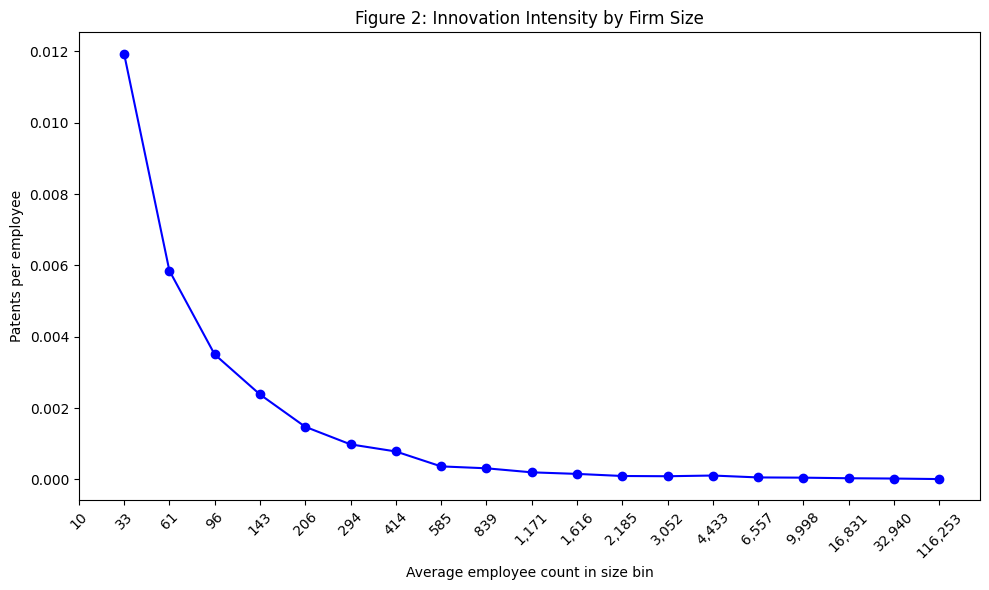

In [50]:
# replicate figure 2
# create 20 roughly equal‐sized bins based on employee count
innovative_firms3['size_bin'] = pd.qcut(innovative_firms3['emp'], q=20)

# Now, group by these bins and calculate:
# - avg_emp: average employee count per bin
# - patens_per_emp: average patents per employee
binned3 = innovative_firms3.groupby('size_bin').agg(
    avg_emp=('emp', 'mean'),
    patens_per_emp=('patents_per_emp', 'mean')
).reset_index()

# create equal spacing in the x-axis corresponding to the bins
binned3['bin_order'] = range(1, len(binned3) + 1)

plt.figure(figsize=(10, 6))
plt.plot(binned3['bin_order'], binned3['patens_per_emp'], marker='o', linestyle='-', color='blue')
plt.xlabel('Average employee count in size bin')
plt.ylabel('Patents per employee')
plt.title('Figure 2: Innovation Intensity by Firm Size')
plt.xticks(ticks=binned3['bin_order'], labels=[f"{x:,.0f}" for x in binned3['avg_emp']], rotation=45)

plt.grid(False)
plt.tight_layout()
plt.show()

In [51]:
# create data frame for the regression
reg_data3 = innovative_firms3[['gvkey', 'fyear', 'patents_per_emp', 'emp']].copy()
reg_data3 = reg_data3.replace([np.inf, -np.inf], np.nan).dropna()

# define log_emp
reg_data3 = reg_data3[reg_data3['emp'].div(1000) > 0]
reg_data3['log_emp'] = np.log(reg_data3['emp'].div(1000))

# set the panel index
reg_data3 = reg_data3.set_index(['gvkey', 'fyear'])

In [52]:
# run the regression
mod = PanelOLS.from_formula('patents_per_emp ~ log_emp + EntityEffects + TimeEffects', data=reg_data3)
results = mod.fit()
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:        patents_per_emp   R-squared:                        0.0042
Estimator:                   PanelOLS   R-squared (Between):              0.0579
No. Observations:               32273   R-squared (Within):               0.0046
Date:                Mon, May 05 2025   R-squared (Overall):             -0.0039
Time:                        10:33:50   Log-likelihood                 5.971e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      122.81
Entities:                        2864   P-value                           0.0000
Avg Obs:                       11.269   Distribution:                 F(1,29388)
Min Obs:                       1.0000                                           
Max Obs:                       21.000   F-statistic (robust):             122.81
                            

In [53]:
### Part 5: R&D Intensity by Firm Size

In [54]:
innovative_firms.head()

,gvkey,tot_pat_year,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,emp,sale,xrd,exchg,costat,fic,sic,max_pat,innovative,emp_growth_rate,size_bin
135,1013,0.0,1980-10-31,1980.0,INDL,C,D,STD,USD,1435.0,55900.0,3.841,14.0,I,USA,3661,5.0,yes,5.435540,"(1382.0, 1880.0]"
136,1013,0.0,1981-10-31,1981.0,INDL,C,D,STD,USD,1513.0,61500.0,4.887,14.0,I,USA,3661,5.0,yes,17.052214,"(1382.0, 1880.0]"
137,1013,0.0,1982-10-31,1982.0,INDL,C,D,STD,USD,1771.0,81654.0,6.059,14.0,I,USA,3661,5.0,yes,7.171090,"(1382.0, 1880.0]"
138,1013,0.0,1983-10-31,1983.0,INDL,C,D,STD,USD,1898.0,76342.0,5.223,14.0,I,USA,3661,5.0,yes,-18.124341,"(1880.0, 2557.65]"
139,1013,5.0,1984-10-31,1984.0,INDL,C,D,STD,USD,1554.0,87595.0,7.721,14.0,I,USA,3661,5.0,yes,11.261261,"(1382.0, 1880.0]"


In [ ]:
# define log_sale
innovative_firms4 = innovative_firms.copy()
innovative_firms4 = innovative_firms4[innovative_firms4['sale'] > 0]
innovative_firms4['log_sale'] = np.log(innovative_firms4['sale'])

# create the lagged log_sales variable
innovative_firms4['lag_log_sale'] = (innovative_firms4 .groupby('gvkey')['log_sale'] .shift(1))
innovative_firms4.head()

,gvkey,tot_pat_year,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,emp,...,exchg,costat,fic,sic,max_pat,innovative,emp_growth_rate,size_bin,log_sale,lag_log_sale
135,1013,0.0,1980-10-31,1980.0,INDL,C,D,STD,USD,1435.0,...,14.0,I,USA,3661,5.0,yes,5.435540,"(1382.0, 1880.0]",10.931320,NaN
136,1013,0.0,1981-10-31,1981.0,INDL,C,D,STD,USD,1513.0,...,14.0,I,USA,3661,5.0,yes,17.052214,"(1382.0, 1880.0]",11.026792,10.931320
137,1013,0.0,1982-10-31,1982.0,INDL,C,D,STD,USD,1771.0,...,14.0,I,USA,3661,5.0,yes,7.171090,"(1382.0, 1880.0]",11.310246,11.026792
138,1013,0.0,1983-10-31,1983.0,INDL,C,D,STD,USD,1898.0,...,14.0,I,USA,3661,5.0,yes,-18.124341,"(1880.0, 2557.65]",11.242979,11.310246
139,1013,5.0,1984-10-31,1984.0,INDL,C,D,STD,USD,1554.0,...,14.0,I,USA,3661,5.0,yes,11.261261,"(1382.0, 1880.0]",11.380479,11.242979


In [56]:
# define log_xrd
innovative_firms4 = innovative_firms4[innovative_firms4['xrd'] > 0]
innovative_firms4['log_xrd'] = np.log(innovative_firms4['xrd'])
innovative_firms4.head()

,gvkey,tot_pat_year,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,emp,...,costat,fic,sic,max_pat,innovative,emp_growth_rate,size_bin,log_sale,lag_log_sale,log_xrd
135,1013,0.0,1980-10-31,1980.0,INDL,C,D,STD,USD,1435.0,...,I,USA,3661,5.0,yes,5.435540,"(1382.0, 1880.0]",10.931320,NaN,1.345733
136,1013,0.0,1981-10-31,1981.0,INDL,C,D,STD,USD,1513.0,...,I,USA,3661,5.0,yes,17.052214,"(1382.0, 1880.0]",11.026792,10.931320,1.586579
137,1013,0.0,1982-10-31,1982.0,INDL,C,D,STD,USD,1771.0,...,I,USA,3661,5.0,yes,7.171090,"(1382.0, 1880.0]",11.310246,11.026792,1.801545
138,1013,0.0,1983-10-31,1983.0,INDL,C,D,STD,USD,1898.0,...,I,USA,3661,5.0,yes,-18.124341,"(1880.0, 2557.65]",11.242979,11.310246,1.653072
139,1013,5.0,1984-10-31,1984.0,INDL,C,D,STD,USD,1554.0,...,I,USA,3661,5.0,yes,11.261261,"(1382.0, 1880.0]",11.380479,11.242979,2.043944


In [57]:
# create data frame for the regression
reg_data4 = innovative_firms4[['gvkey', 'fyear', 'lag_log_sale', 'log_xrd','sic']].copy()
reg_data4 = reg_data4.replace([np.inf, -np.inf], np.nan).dropna()

# set the panel index
reg_data4 = reg_data4.set_index(['gvkey', 'sic', 'fyear'])
reg_data4.head()

lag_log_sale   log_xrd
gvkey sic  fyear                         
1013  3661 1981.0     10.931320  1.586579
           1982.0     11.026792  1.801545
           1983.0     11.310246  1.653072
           1984.0     11.242979  2.043944
           1985.0     11.380479  2.471821

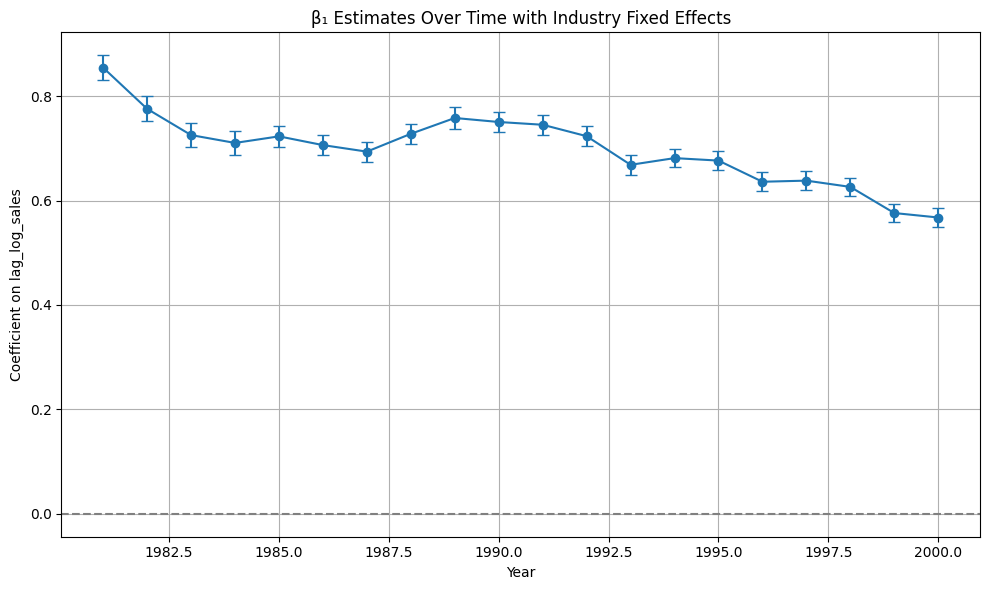

In [ ]:
import statsmodels.formula.api as smf

# Ensure your lagged sales is correctly set (this assumes it's already lagged)
data = innovative_firms4[['gvkey', 'fyear', 'sic', 'lag_log_sale', 'log_xrd']].dropna()

# Store results
results = []

# Loop through each year and run regression
for year in sorted(data['fyear'].unique()):
    df_year = data[data['fyear'] == year]
    
    # Use sector fixed effects via C(sic)
    model = smf.ols('log_xrd ~ lag_log_sale + C(sic)', data=df_year).fit()
    
    # Save beta1 (log_sale) and standard error
    beta1 = model.params['lag_log_sale']
    stderr = model.bse['lag_log_sale']
    
    results.append({'year': year, 'beta1': beta1, 'stderr': stderr})

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(results_df['year'], results_df['beta1'], yerr=results_df['stderr'], fmt='-o', capsize=4)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Coefficient on lag_log_sales')
plt.title('β₁ Estimates Over Time with Industry Fixed Effects')
plt.grid(True)
plt.tight_layout()
plt.show()